In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
from dataset_split import get_filenames_from_path, gen_filename_dataframe

original_train_dir = os.path.abspath("./original_data/train/train")
original_test_dir = os.path.abspath("./original_data/test/test")

train_pictures_filenames = get_filenames_from_path(original_train_dir)
df = gen_filename_dataframe(train_pictures_filenames)
df.head()

,filename,_cat,_dog
0,dog.8011.jpg,0,1
1,cat.5077.jpg,1,0
2,dog.7322.jpg,0,1
3,cat.2718.jpg,1,0
4,cat.10151.jpg,1,0


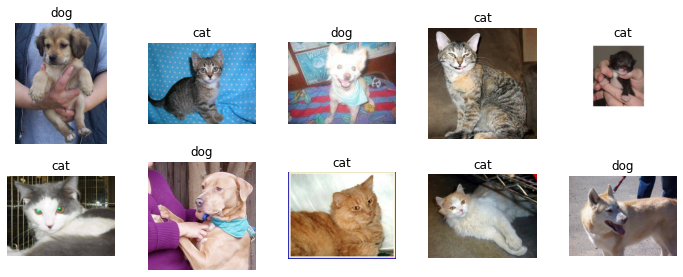

In [25]:
from image_operations import display_images

display_images(df)

(374, 500, 3)
(187, 250, 3)


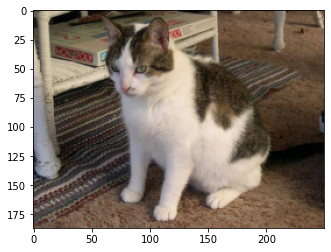

In [9]:
image = plt.imread(f"{original_train_dir}/cat.5682.jpg")
resize_factor = .5
print(image.shape)
new_size = int(image.shape[1]*resize_factor), int(image.shape[0]*resize_factor)

image = cv2.resize(image, new_size)
plt.imshow(image)
print(image.shape)

In [4]:
from dataset_split import select_sample_by_type

train_dogs = select_sample_by_type(df, animal =0, sample_size = 800)
train_cats = select_sample_by_type(df, animal =1, sample_size = 800)
# Drop selected data to disallow double picking i

In [ ]:
train_dogs

,filename,label
3518,dog.9057.jpg,dog
23839,dog.9061.jpg,dog
17759,dog.9943.jpg,dog
9872,dog.11577.jpg,dog
20154,dog.3825.jpg,dog
...,...,...
21510,dog.4387.jpg,dog
2801,dog.6200.jpg,dog
16485,dog.11966.jpg,dog
12051,dog.8466.jpg,dog


In [ ]:
df.shape

(23400, 2)

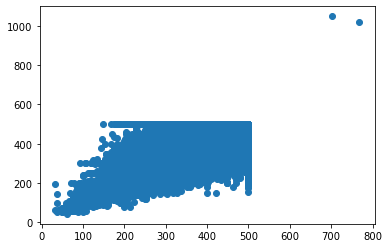

oversized pictures : ['cat.835.jpg', 'dog.2317.jpg']


In [12]:
def plot_dimesion_distribution(df):
    """Reads pictures from filepath column of dataframe,
       extracts width and height pixel values and scatter plots.
       Also returns a list of picture sizes tuples"""
    all_dims =[]
    big_img = []
    for i, path in df['filename'].items():
        img = plt.imread(f"{original_train_dir}/{path}")
        all_dims.append((img.shape[0], img.shape[1]))
        if img.shape[0] > 700:
            big_img.append(df['filename'][i])
    
    plt.scatter(*zip(*all_dims))
    plt.show()
    print(f"oversized pictures : {big_img}")
    return all_dims

sizes = plot_dimesion_distribution(df)

In [17]:
dimesions_df = pd.DataFrame(sizes, columns =['height', 'width'])
dimesions_df_complte = pd.merge(df, dimesions_df, left_index=True, right_index=True)
dimesions_df_complte

,filename,_cat,_dog,height,width
0,dog.8011.jpg,0,1,500,380
1,cat.5077.jpg,1,0,300,399
2,dog.7322.jpg,0,1,120,159
3,cat.2718.jpg,1,0,480,467
4,cat.10151.jpg,1,0,375,499
...,...,...,...,...,...
24995,dog.8008.jpg,0,1,350,249
24996,dog.1992.jpg,0,1,375,499
24997,dog.12412.jpg,0,1,500,475
24998,cat.2701.jpg,1,0,296,500


In [28]:
biggies = [img for img in sizes if img[0] > 700]
biggies

[(768, 1023), (702, 1050)]

In [34]:
squares = [img for img in sizes if img[0] > img[1]]
len(squares)

7266

In [35]:
print(f"ratio squares : {len(squares)/len(sizes)}")

ratio squares : 0.31051282051282053


In [5]:
for number in range(2):
    print(number)

0
1


In [4]:
from dataset_split import Complete_set_split_filenames

small_test_filenames, small_val_filenames, small_train_filemnames = Complete_set_split_filenames(df, (800,200,250))
tiny_test_filenames, tiny_val_filenames, tiny_train_filemnames = Complete_set_split_filenames(df, (160,40,50))


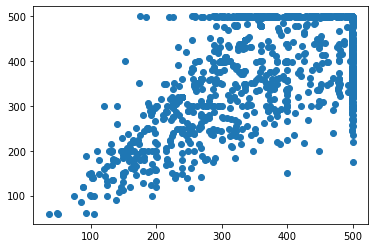

oversized pictures : []


[(430, 482),
 (375, 499),
 (454, 500),
 (280, 499),
 (479, 360),
 (370, 499),
 (383, 360),
 (477, 433),
 (500, 480),
 (366, 499),
 (375, 499),
 (375, 499),
 (499, 398),
 (375, 499),
 (374, 500),
 (375, 499),
 (343, 431),
 (374, 500),
 (499, 470),
 (222, 213),
 (341, 453),
 (499, 500),
 (375, 499),
 (499, 375),
 (329, 216),
 (499, 411),
 (417, 374),
 (407, 399),
 (287, 174),
 (437, 500),
 (181, 200),
 (500, 402),
 (300, 399),
 (499, 438),
 (253, 117),
 (93, 60),
 (332, 500),
 (269, 207),
 (374, 500),
 (373, 500),
 (333, 500),
 (375, 499),
 (374, 500),
 (500, 374),
 (500, 374),
 (482, 499),
 (374, 499),
 (499, 449),
 (374, 500),
 (221, 316),
 (229, 312),
 (164, 179),
 (500, 381),
 (324, 479),
 (403, 499),
 (379, 375),
 (331, 500),
 (328, 500),
 (170, 185),
 (193, 199),
 (500, 320),
 (416, 411),
 (49, 61),
 (374, 500),
 (323, 343),
 (188, 307),
 (396, 399),
 (374, 500),
 (495, 500),
 (411, 284),
 (499, 356),
 (500, 332),
 (339, 255),
 (374, 500),
 (236, 249),
 (481, 349),
 (375, 500),
 (4

In [8]:
plot_dimesion_distribution(small_test_filenames)

In [20]:
oversized_pictures = ['cat.835.jpg', 'dog.2317.jpg']
dimesions_df_complte = dimesions_df_complte[~dimesions_df_complte['filename'].isin(oversized_pictures)]

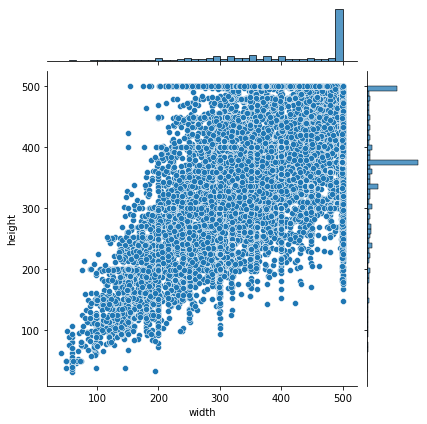

In [21]:
sns.jointplot(data=dimesions_df_complte, x='width', y='height')